### Problem Statement : 
----
### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

----
### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier

### Import Data

In [2]:
fraud_data = pd.read_csv("Fraud_check.csv")
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


### Data Understanding

In [5]:
fraud_data.shape

(600, 6)

In [6]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud_data.describe(include = 'all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [8]:
fraud_data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [9]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Understanding the target variable 

In [10]:
fraud_data['Taxable.Income'].nunique()

599

In [11]:
fraud_data['Taxable.Income'].unique()

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

### Data Manipulation

In [12]:
fraud_data=fraud_data.rename({'Taxable.Income':'Tax_Income','Marital.Status':'Marital_Status','Work.Experience':'Work_Exp','City.Population':'Population'},axis=1)

In [13]:
fraud_data.head()

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [14]:
encoder = LabelEncoder()

In [15]:
fraud_data['Undergrad'] = encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital_Status'] = encoder.fit_transform(fraud_data['Marital_Status'])
fraud_data['Urban'] = encoder.fit_transform(fraud_data['Urban'])
fraud_data

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


### Correlation of the features 

In [16]:
corr = fraud_data.corr()
corr

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital_Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Tax_Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work_Exp,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


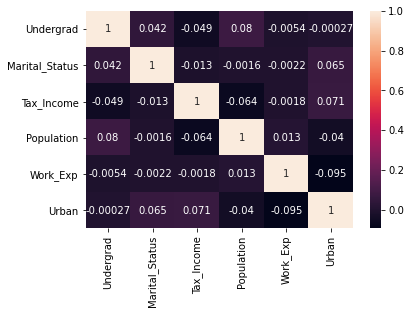

In [17]:
sns.heatmap(corr,annot=True)
plt.show()

-----
### Since the target variable is continious, we create a class of the value based on the tax_value <= 30000 as "Risky" and others are "Good"


In [18]:
tax_val = []
for value in fraud_data["Tax_Income"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
fraud_data["tax_val"]= tax_val

In [19]:
fraud_data

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban,tax_val
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


### Uderstanding the new target variable after converting the numerical data of target variable into categorical data

In [20]:
fraud_data['tax_val'].unique()

array(['Good', 'Risky'], dtype=object)

In [21]:
fraud_data['tax_val'].value_counts()

Good     476
Risky    124
Name: tax_val, dtype: int64

In [22]:
fraud_data['tax_val'].count()

600

In [23]:
print('skewness of the dataset:\n','\n',fraud_data.skew())
print('--------------------------------------------------------')
print('kurtosis values of the dataset:\n','\n',fraud_data.kurtosis())

skewness of the dataset:
 
 Undergrad        -0.080265
Marital_Status   -0.086622
Tax_Income        0.030015
Population        0.125009
Work_Exp          0.018529
Urban            -0.013367
dtype: float64
--------------------------------------------------------
kurtosis values of the dataset:
 
 Undergrad        -2.000236
Marital_Status   -1.514965
Tax_Income       -1.199782
Population       -1.120154
Work_Exp         -1.167524
Urban            -2.006521
dtype: float64


Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


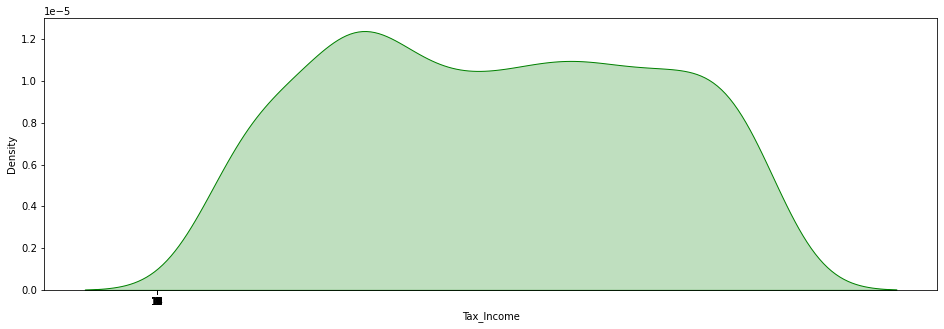

In [24]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(fraud_data['Tax_Income'].skew()))
print("Kurtosis: {}".format(fraud_data['Tax_Income'].kurtosis()))
ax = sns.kdeplot(fraud_data['Tax_Income'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The data is Skewed on the right
### The data has negative Kurtosis

-----
### Outlier Check

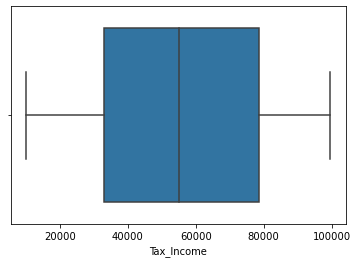

In [25]:
sns.boxplot(fraud_data['Tax_Income'])
plt.show()

### There's no outlier in the target variable

---
### Model Building

In [26]:
X = fraud_data.drop(['Tax_Income','tax_val'],axis=1)
y = fraud_data[['tax_val']]

In [27]:
X.shape , y.shape

((600, 5), (600, 1))

In [28]:
X.head()

,Undergrad,Marital_Status,Population,Work_Exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [29]:
y.head()

,tax_val
0,Good
1,Good
2,Good
3,Good
4,Good


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12121,stratify=y)

In [31]:
X_train.shape,y_train.shape

((480, 5), (480, 1))

In [32]:
X_test.shape,y_test.shape

((120, 5), (120, 1))

### Model Training

In [33]:
dt_model = DecisionTreeClassifier(max_depth= 5, criterion='gini')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

### Plot the tree

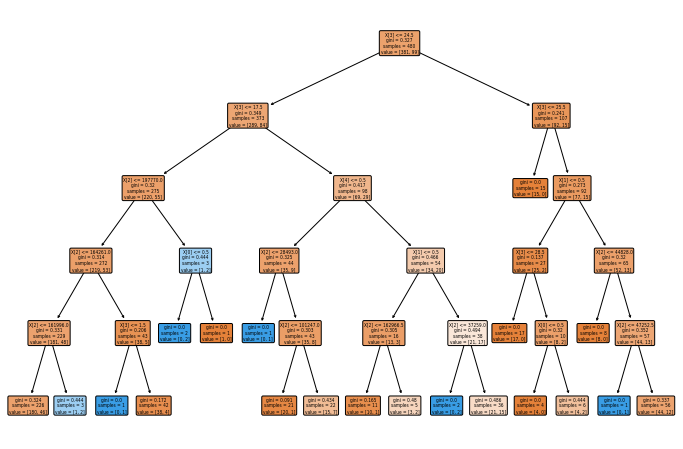

In [34]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree= dt_model , filled = True, rounded = True)
plt.show()

### Model Testing

### Training Data

In [35]:
y_pred_train = dt_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

Good     470
Risky     10
dtype: int64

In [36]:
y_pred_train

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
    

### Model Evaluation

### Training Data

In [37]:
print('Accuracy Score           :', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train))

Accuracy Score           : 0.8104166666666667
---------------------------
Confusion Matrix         :
 [[380   1]
 [ 90   9]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        Good       0.81      1.00      0.89       381
       Risky       0.90      0.09      0.17        99

    accuracy                           0.81       480
   macro avg       0.85      0.54      0.53       480
weighted avg       0.83      0.81      0.74       480



### Model Testing 
----
### Testing Data

In [38]:
y_pred_test = dt_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

Good     116
Risky      4
dtype: int64

In [39]:
y_pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
  

### Model Evaluation
### Testing Data

In [40]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.7916666666666666
---------------------------
Confusion Matrix:
 [[93  2]
 [23  2]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        Good       0.80      0.98      0.88        95
       Risky       0.50      0.08      0.14        25

    accuracy                           0.79       120
   macro avg       0.65      0.53      0.51       120
weighted avg       0.74      0.79      0.73       120



### Automate the way for getting Optimal Values for Hyperparameter

In [54]:
grid_search_cv = GridSearchCV(estimator=dt_model,param_grid={'criterion':['entropy','gini'],
                                           'max_depth':[6,7,8,9,10]}, cv=3)
grid_search_cv.fit(X_train,y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 6}
0.7645833333333334


### Model Training

In [55]:
dt_model_ent = DecisionTreeClassifier(max_depth= 6, criterion='entropy')
dt_model_ent.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

### Model Testing
### Train Data


In [56]:
y_pred_train = dt_model_ent.predict(X_train)
pd.Series(y_pred_train).value_counts()

Good     457
Risky     23
dtype: int64

In [57]:
y_pred_train

array(['Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
 

### Model Evaluation 
---
### Train Data

In [58]:
print('Accuracy Score           :', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train))

Accuracy Score           : 0.8208333333333333
---------------------------
Confusion Matrix         :
 [[376   5]
 [ 81  18]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        Good       0.82      0.99      0.90       381
       Risky       0.78      0.18      0.30        99

    accuracy                           0.82       480
   macro avg       0.80      0.58      0.60       480
weighted avg       0.81      0.82      0.77       480



### Model Testing 
----
### Test Data

In [59]:
y_pred_test = dt_model_ent.predict(X_test)
pd.Series(y_pred_test).value_counts()

Good     115
Risky      5
dtype: int64

In [60]:
y_pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
 

### Model Evaluation 
----
### Test Data

In [61]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.8
---------------------------
Confusion Matrix:
 [[93  2]
 [22  3]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        Good       0.81      0.98      0.89        95
       Risky       0.60      0.12      0.20        25

    accuracy                           0.80       120
   macro avg       0.70      0.55      0.54       120
weighted avg       0.77      0.80      0.74       120



### Conclusion : As seen from the above, model with criterion : ' Entropy ' and max_depth : 6 gives the best accuracy score of 80%
### So 80% of the persons have ' Good '  taxable_income.


### Check the feature importance

In [62]:
dt_model_ent.feature_importances_

array([0.03496866, 0.09945496, 0.64966947, 0.18464336, 0.03126356])

In [63]:
feature_imp = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': dt_model_ent.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [64]:
feature_imp

,feature,importance
2,Population,0.649669
3,Work_Exp,0.184643
1,Marital_Status,0.099455
0,Undergrad,0.034969
4,Urban,0.031264


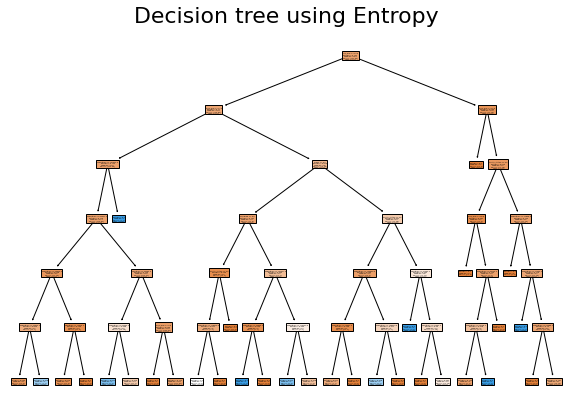

In [66]:
fig = plt.figure(figsize=(10,7))
fig = plot_tree(dt_model_ent,
                     feature_names= ['Undergrad','Marital_Status','Population','Work_Exp','Urban'], class_names= ['Good','Risky'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.show()